# DIGIT GLYPH 

## A Hand Written Digit Recognition Web App

####  DigitGlyph: Bridging Art and Technology for Handwritten Digit Recognition

DigitGlyph is an innovative web application that brings together the world of artistic expression and cutting-edge technology. By leveraging the power of Convolutional Neural Networks (CNNs), DigitGlyph enables the recognition and classification of handwritten digits, creating a dynamic fusion between human creativity and machine intelligence.


Access the Web App here : [DigitGlyph](https://gokul-raja84.github.io/DigitGlyph/)

#### Project Overview:

At the core of DigitGlyph lies a 17-layer CNN model, meticulously designed for recognizing and classifying handwritten digits. Trained on the venerable MNIST dataset, consisting of 70,000 grayscale images, the model transforms pixelated strokes into meaningful digital interpretations. With a carefully crafted combination of Conv2D, MaxPooling2D, BatchNormalization, Dense, Flatten, and Dropout layers, the model achieves an impressive accuracy of 99.15% after 30 epochs of training. The input layer, housing 32 neurons, feeds into an output layer with 10 neurons, corresponding to the 10 distinct digit classes.

- The model achieves an accuracy of 99.15%, showcasing its strong ability to accurately recognize and classify handwritten digits.It highlights the successful implementation of DigitGlyph, operating as a robust and potent tool for precise digit recognition

### MNIST Handwritten Digits Classification using Convolutional Neural Networks

In [3]:
# Importing required libraries

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten,BatchNormalization
from tensorflow.keras.datasets import mnist

import tensorflow.keras.backend as K

# This code implements a Convolutional Neural Network (CNN) to classify the MNIST dataset of handwritten digits.

### Loading and Splitting the MNIST dataset into training and testing sets

In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

### Exploring MNIST Dataset Dimensions

In [5]:
# Printing the dimensions of the dataset arrays

print("Dimension of x_train:", x_train.shape)  # Displaying the shape of the training data
print("Dimension of x_test:", x_test.shape)    # Displaying the shape of the testing data
print("Dimension of y_test:", y_test.shape)    # Displaying the shape of the testing labels

Dimension of x_train: (60000, 28, 28)
Dimension of x_test: (10000, 28, 28)
Dimension of y_test: (10000,)


### Visualizing a Single Image from the MNIST Dataset

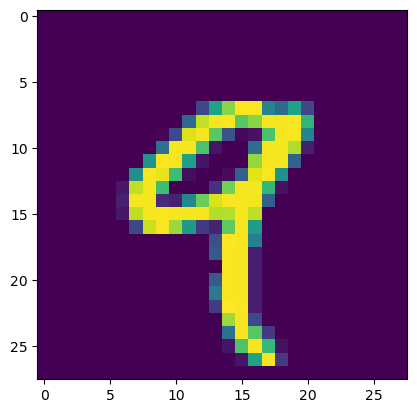

Label: 9


In [6]:
# This code displays a single image from the MNIST dataset along with its corresponding label.

import numpy as np
import matplotlib.pyplot as plt

# Displaying a single image from the training dataset
plt.imshow(x_train[4])  # Displaying the image using matplotlib
plt.show()

# Printing the corresponding label of the displayed image

print("Label:", y_train[4])

### Defining Parameters for the Neural Network Model

This code sets up various parameters that will be used when constructing a neural network model.

In [7]:
# Setting Up Parameters for MNIST Image Classification
# This code defines essential parameters for an MNIST image classification model.

# Defining the number of classes in the classification problem

num_classes = 10  # MNIST dataset has 10 classes (digits 0 to 9)

# Defining the number of training epochs

epochs = 30

# Defining image dimensions for preprocessing

img_rows = 28  # Height of each image in pixels
img_cols = 28  # Width of each image in pixels

### Data Normalization and Label Encoding for MNIST Classification

In [8]:
# This code performs data normalization and label encoding for the MNIST dataset.

# Normalizing image data to a range of [0, 1]

x_train = x_train.astype(float)
x_train /= 255.0  # Scaling pixel values to be between 0 and 1
x_test = x_test.astype(float)
x_test /= 255.0   # Scaling pixel values to be between 0 and 1

# Importing utility for one-hot encoding
from tensorflow.keras.utils import to_categorical

# Performing one-hot encoding for label data
y_train = to_categorical(y_train, num_classes=10, dtype='float32')  # Converting labels to one-hot encoded vectors
y_test = to_categorical(y_test, num_classes=10, dtype='float32')    # Converting labels to one-hot encoded vectors

### Formatting Image Data for Neural Network Input

In [11]:
# This code adjusts the format of image data based on the preferred channel order for neural network input.

# Checking the image data format preference
if K.image_data_format() == 'channels_first':
    
    # Reshaping image data for 'channels_first' format (channel first, then image dimensions)
    
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)  # Input shape for the neural network
    
else:
    # Reshaping image data for 'channels_last' format (image dimensions first, then channel)
    
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)  # Input shape for the neural network

### Building a Convolutional Neural Network (CNN) Model for MNIST Classification

In [12]:
# This code constructs a Convolutional Neural Network (CNN) model for classifying the MNIST dataset.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense

# Creating a Sequential model
model = Sequential()

# Adding Convolutional and Pooling layers
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(MaxPooling2D())
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Flattening and adding Dense layers
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

### Compiling the Convolutional Neural Network (CNN) Model

In [50]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# This code compiles the constructed CNN model for the MNIST classification task.

In [51]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 11, 11, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 6, 6, 32)          25632     
_________________________________________________________________
batch_normalization_1 (Batch (None, 6, 6, 32)          128       
_________________________________________________________________
dropout_4 (Dropout)          (None, 6, 6, 32)         

### Training the Convolutional Neural Network (CNN) Model

In [52]:
# This code trains the compiled CNN model using the training dataset and validates it on the test dataset.

# Training the CNN model

model.fit(x_train, y_train,             # Training data and labels
          batch_size=batch_size,       # Number of samples per gradient update
          epochs=epochs,               # Number of times to iterate over the training dataset
          validation_data=(x_test, y_test))  # Validation data for evaluating model performance


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 38s 638us/sample - loss: 0.4194 - accuracy: 0.8753 - val_loss: 0.7520 - val_accuracy: 0.7056
Epoch 2/30
60000/60000 [==============================] - 42s 695us/sample - loss: 0.1178 - accuracy: 0.9689 - val_loss: 0.0510 - val_accuracy: 0.9827
Epoch 3/30
60000/60000 [==============================] - 35s 579us/sample - loss: 0.0803 - accuracy: 0.9780 - val_loss: 0.0377 - val_accuracy: 0.9872
Epoch 4/30
60000/60000 [==============================] - 39s 642us/sample - loss: 0.0612 - accuracy: 0.9832 - val_loss: 0.0392 - val_accuracy: 0.9889
Epoch 5/30
60000/60000 [==============================] - 44s 728us/sample - loss: 0.0526 - accuracy: 0.9855 - val_loss: 0.0264 - val_accuracy: 0.9912
Epoch 6/30
60000/60000 [==============================] - 43s 709us/sample - loss: 0.0457 - accuracy: 0.9875 - val_loss: 0.0266 - val_accuracy: 0.9911
Epoch 7/30
60000/60000 [====================

### Evaluating the Trained Convolutional Neural Network (CNN) Model

In [54]:
# This code evaluates the trained CNN model on the test dataset and prints the score and accuracy.

# Evaluating the trained CNN model on the test dataset
score, accuracy = model.evaluate(x_test, y_test)  # Evaluating the model's performance

# Printing the evaluation results
print("Score:", score)         # Displaying the model's score
print("Accuracy:", accuracy)   # Displaying the model's accuracy

10000/10000 [==============================] - 2s 224us/sample - loss: 0.0360 - accuracy: 0.9915
Score is : 0.03601376320495292
Accuracy : 0.9915


In [55]:
# This code saves the trained CNN model's architecture and weights to files.

# Converting the trained CNN model's architecture to JSON format

model_json = model.to_json()

# Saving the model's architecture to a JSON file

with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Saving the trained model's weights to a HDF5 file

model.save_weights("model.h5")

### Converting and Saving Keras Model to TensorFlow.js Format

In [57]:
import tensorflowjs as tfjs

# Convert and save the Keras model to TensorFlow.js format

tfjs.converters.save_keras_model(model,'C:/Users/GOKUL RAJA/PycharmProjects/pythonProject/model_tfjs')

### Conclusion

DigitGlyph isn't just a tool for recognizing digits; it's fusion between creative expression and technological innovation. By transforming handwritten strokes into meaningful classifications, DigitGlyph transcends traditional boundaries and showcases the potential of harmonizing art and technology. Join us on this captivating journey at [DigitGlyph Web App](https://gokul-raja84.github.io/DigitGlyph/) and experience the magic firsthand.


### Connect with Us

For feedback, suggestions, or collaborations, feel free to connect with us on [GitHub](https://github.com/Gokul-Raja84) or [Contact Me](mailto:gokulraja840@gmail.com). Let's explore the realms of art and technology together!


### Acknowledgements

Feel Free to Explore and Experiment: I encourage you to delve into the codebase, tinker with various architectures and hyperparameters, and contribute to enhancing the model's accuracy and performance. Your insights and innovations can play a crucial role in advancing this project !

